In [5]:
import big_o as big
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

NUMB_DATOS = 1 ## 0(3 casos) y 1(4 casos)

df = pd.read_csv("./auxTiempos.csv")#, error_bad_lines=False)
data = df.values

dfTiempos = df
dfTamanos = df

#delete size data to test predictions
if NUMB_DATOS == 1:
    tiempos = dfTiempos.drop(['N', 'N.1', 'N.2', 'N.3', 'tipo'], axis=1)
    tamanos = dfTamanos.drop(['seconds', 'seconds.1', 'seconds.2', 'seconds.3', 'tipo'], axis=1)
else :
    tiempos = dfTiempos.drop(['N', 'N.1', 'N.2', 'tipo'], axis=1)
    tamanos = dfTamanos.drop(['seconds', 'seconds.1', 'seconds.2', 'tipo'], axis=1)
    
npTiempos = tiempos.values
npTamanos = tamanos.values
npTamanos = npTamanos.astype('int64')
npTiempos = npTiempos.astype('float64')
npTiempos = npTiempos.flatten().tolist()
npTamanos = npTamanos.flatten().tolist()

aTamanos = np.array(npTamanos)
aTiempos = np.array(npTiempos)

Tamaños: [ 100000  300000  500000 1000000]
Tiempos: [0.171767   0.45322847 0.73277974 1.44481683]


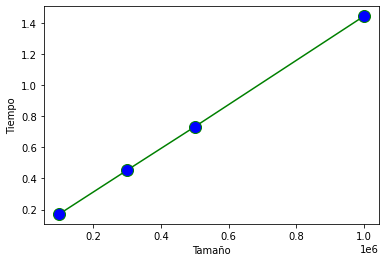

In [6]:
x = aTamanos
y = aTiempos

print("Tamaños:", x)
print("Tiempos:", y)

plt.plot(x, y, color='green', marker='o', markerfacecolor='blue', markersize=12)
plt.xlabel('Tamaño')
plt.ylabel('Tiempo')
plt.show()

In [7]:
############################ LLAMADA A LA LIBRERIA ###########################
def time_complex(ns, time):
    
    best, fitted = big.infer_big_o_class(ns, time, verbose=False)

    return best, fitted

In [17]:
#coste = str(time_complex(aTamanos,aTiempos)[0]).split(':')
#print('\033[1m' + coste[0] + '\033[0m')
#print(coste[1])
coste,resto = time_complex(aTamanos,aTiempos)

print('\033[1m' + str(coste) + '\n' + '\033[0m')
for class_, residuals in resto.items():
    print('{!s:<60s}    (res: {:.2G})'.format(class_, residuals))

Linear: time = 0.029 + 1.4E-06*n (sec)

Constant: time = 0.7 (sec)                                      (res: 0.9)
Linear: time = 0.029 + 1.4E-06*n (sec)                          (res: 1.5E-05)
Quadratic: time = 0.85 + -4.2E-10*n^2 (sec)                     (res: 0.39)
Cubic: time = 0.71 + -5.8E-11*n^3 (sec)                         (res: 0.86)
Polynomial: time = -12 * x^0.92 (sec)                           (res: 0.0018)
Logarithmic: time = -6.1 + 0.53*log(n) (sec)                    (res: 0.11)
Linearithmic: time = 0.067 + 1E-07*n*log(n) (sec)               (res: 0.00027)
Exponential: time = -1.7 * 2.2E-06^n (sec)                      (res: 0.24)
